In [2]:
!pip install seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [8]:
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [5]:
df = pd.read_csv('AIML Dataset.csv')

In [6]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [10]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [23]:
len(df.columns)

11

In [27]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [25]:
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [24]:
df.groupby('isFraud')['isFlaggedFraud'].sum()
## this actually tells us only 16 of the the total records where detected correctly

isFraud
0     0
1    16
Name: isFlaggedFraud, dtype: int64

In [18]:
## this tells us how many of the frauds that happened where correctly flagged
pd.crosstab(df['isFraud'], df['isFlaggedFraud'])

## Inference : 16 of the total frauds where actually identified
## 8197 out of the 8213 total frauds went undetected
## NO false flag was raised for a legit transaction

isFlaggedFraud,0,1
isFraud,,
0,6354407,0
1,8197,16


In [22]:
##total records 
df.shape[0]

6362620

In [32]:
## Total fraud records
total_frauds = df['isFraud'].value_counts()[1]

total_records = df.shape[0]

percentage_fraud_transactions = (total_frauds/total_records)*100

# percentage of fraud detections
round(percentage_fraud_transactions,2)

0.13

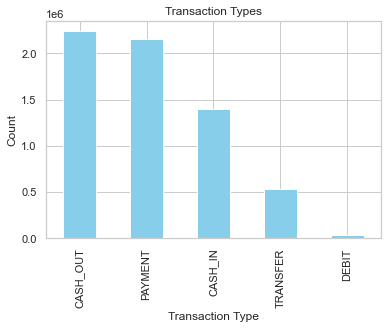

In [47]:
df["type"].value_counts().sort_values(ascending=False).plot(kind = "bar", title  ="Transaction Types", color = 'skyblue')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

In [39]:
df.groupby('type')['isFraud'].sum()

type
CASH_IN        0
CASH_OUT    4116
DEBIT          0
PAYMENT        0
TRANSFER    4097
Name: isFraud, dtype: int64

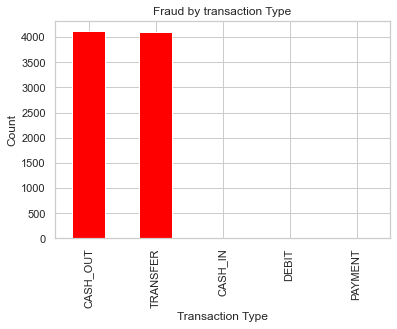

In [46]:
df.groupby('type')['isFraud'].sum().sort_values(ascending=False).plot(kind='bar',title='Fraud by transaction Type',color = 'red')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

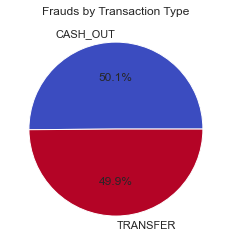

In [44]:
fraud_counts = df[df['isFraud'] == 1].groupby('type').size()

fraud_percent = fraud_counts / fraud_counts.sum() * 100

fraud_percent.plot(
    kind='pie',
    autopct='%1.1f%%',
    colormap='coolwarm',
    title='Frauds by Transaction Type'
)

plt.ylabel('')
plt.show()

In [50]:
df['amount'].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int32

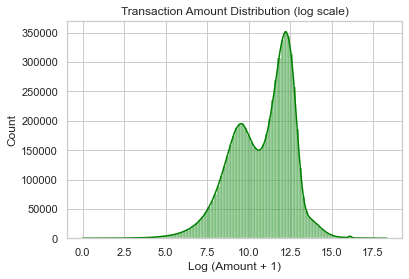

In [52]:
sns.histplot(np.log1p(df["amount"]), bins = 100, kde = True, color = 'green')
plt.title('Transaction Amount Distribution (log scale)')
plt.xlabel("Log (Amount + 1)")
plt.show()

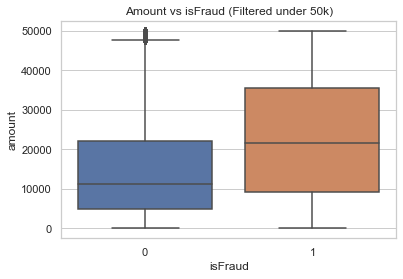

In [53]:
sns.boxplot(data = df[df["amount"] < 50000], x = "isFraud", y = "amount")
plt.title("Amount vs isFraud (Filtered under 50k)")
plt.show()

In [69]:
df["balanceDiffOrig"] = df["oldbalanceOrg"] - df["newbalanceOrig"]
df["balanceDiffDest"] = df["newbalanceDest"] - df["oldbalanceDest"]

In [70]:
(df["balanceDiffOrig"]<0).sum()

1399253

In [71]:
df.head(3)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0


In [72]:
df[df["balanceDiffOrig"]<0]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
389,1,CASH_IN,143236.26,C1862994526,0.00,143236.26,C1688019098,608932.17,97263.78,0,0,-143236.26,-511668.39
390,1,CASH_IN,228451.89,C1614133563,143236.26,371688.15,C2083562754,719678.38,1186556.81,0,0,-228451.89,466878.43
391,1,CASH_IN,35902.49,C839771540,371688.15,407590.65,C2001112025,49003.30,0.00,0,0,-35902.50,-49003.30
392,1,CASH_IN,232953.64,C1037163664,407590.65,640544.28,C33524623,1172672.27,1517262.16,0,0,-232953.63,344589.89
393,1,CASH_IN,65912.95,C180316302,640544.28,706457.23,C1330106945,104198.26,24044.18,0,0,-65912.95,-80154.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362253,718,CASH_IN,188888.89,C1459052107,51838.00,240726.89,C1955750585,0.00,0.00,0,0,-188888.89,0.00
6362271,718,CASH_IN,27919.60,C562982749,2413.00,30332.60,C240654881,512791.59,484871.98,0,0,-27919.60,-27919.61
6362279,718,CASH_IN,78988.38,C886862695,204464.00,283452.38,C262804200,108724.19,29735.81,0,0,-78988.38,-78988.38
6362298,718,CASH_IN,18000.26,C50108853,63409.00,81409.26,C204102272,28088.61,10088.34,0,0,-18000.26,-18000.27


In [73]:
df[df["balanceDiffOrig"]<0].shape

(1399253, 13)

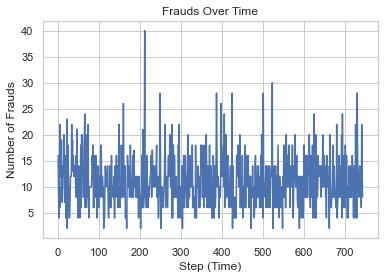

In [74]:
frauds_per_step = df[df["isFraud"] == 1]["step"].value_counts().sort_index()

plt.plot(frauds_per_step.index, frauds_per_step.values, label="Frauds per Step")
plt.xlabel("Step (Time)")
plt.ylabel("Number of Frauds")
plt.title("Frauds Over Time")
plt.grid(True)
plt.show()

## So as we can see there is no great deal of relation between step and frauds
## so we will drop it

In [75]:
(df['balanceDiffDest']<0).sum()

1238864

In [78]:
top_senders = df["nameOrig"].value_counts().sort_values(ascending=False).head(10)

In [79]:
top_senders

C1902386530    3
C2098525306    3
C363736674     3
C1530544995    3
C1065307291    3
C2051359467    3
C1832548028    3
C400299098     3
C1976208114    3
C1999539787    3
Name: nameOrig, dtype: int64

In [80]:
top_receivers = df["nameDest"].value_counts().sort_values(ascending=False).head(10)

In [81]:
top_receivers

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C451111351      99
C1789550256     99
C1360767589     98
C1023714065     97
Name: nameDest, dtype: int64

In [84]:
## earlier in the bar chart we saw Transfer and cash out are 
## the 2 mosttypes of payment prone to frauds
fraud_types = df[df["type"].isin(["TRANSFER","CASH_OUT"])]

In [87]:
fraud_types.groupby("type")["type"].count()

type
CASH_OUT    2237500
TRANSFER     532909
Name: type, dtype: int64

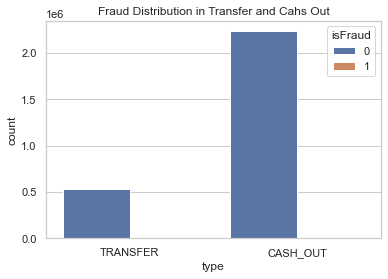

In [89]:
sns.countplot(data = fraud_types, x="type", hue="isFraud")
plt.title("Fraud Distribution in Transfer and Cahs Out")
plt.show()

In [91]:
# Select required columns INCLUDING isFraud
corr = df[[
    "amount",
    "oldbalanceOrg",
    "newbalanceOrig",
    "oldbalanceDest",
    "newbalanceDest",
    "isFraud"
]].corr()

# Display correlation matrix
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


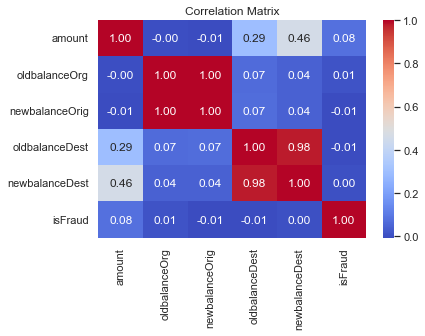

In [92]:
sns.heatmap(corr, annot=True, cmap = 'coolwarm', fmt= '.2f')
plt.title('Correlation Matrix')
plt.show()

In [93]:
## Here by identifying which accounts are totally emptying their account we can
## find the probable scammers
zero_after_transfer = df[
    (df["oldbalanceOrg"] > 0) &
    (df["newbalanceOrig"] == 0)&
    (df["type"].isin(["TRANSFER","CASH_OUT"]))
]

In [95]:
len(zero_after_transfer)
## hence over a million records are present where the acc was totally emptied

1188074

## Getting Started With Feature Engineering Model and data pipeline buidling

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [97]:
df_model = df.drop(["nameOrig", "nameDest", "isFlaggedFraud"], axis=1)

In [98]:
df_model.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,-21182.0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [102]:
## Setting up the categorical and numerical types
categorical = ["type"]
numerical = ["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]

In [103]:
y = df_model["isFraud"]
x = df_model.drop("isFraud", axis = 1)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)
#stratify=y ensures that the class distribution of the target variable (y) 
#is preserved in both the training and testing sets.

In [105]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical),
        ("cat", OneHotEncoder(drop="first"), categorical)
    ],
    remainder="drop"
)

In [108]:
pipeline = Pipeline([
    ("prep", preprocessor),
    ("clf",LogisticRegression(class_weight="balanced", max_iter=1000))
])

In [109]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('clf',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [111]:
y_pred = pipeline.predict(X_test)

In [113]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.94      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.94      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



In [115]:
print(confusion_matrix(y_test, y_pred))

[[1804928  101394]
 [    154    2310]]


In [120]:
import pandas as pd

cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

cm_df = pd.DataFrame(
    cm,
    index=["Actual_Not_Fraud", "Actual_Fraud"],
    columns=["Pred_Not_Fraud", "Pred_Fraud"]
)
# [[TN  FP]
#  [FN  TP]]

print(cm_df)

                  Pred_Not_Fraud  Pred_Fraud
Actual_Not_Fraud         1804928      101394
Actual_Fraud                 154        2310


In [121]:
accuracy_score = pipeline.score(X_test, y_test)*100

In [122]:
accuracy_score

94.67996936272584

In [124]:
import joblib

joblib.dump(pipeline, "fraud_detection_pipeline.pkl")

['fraud_detection_pipeline.pkl']